In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
sns.set()

In [3]:
# df = pd.read_csv('./data/audi.csv')
df = sns.load_dataset('tips')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
24,19.82,3.18,Male,No,Sat,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2


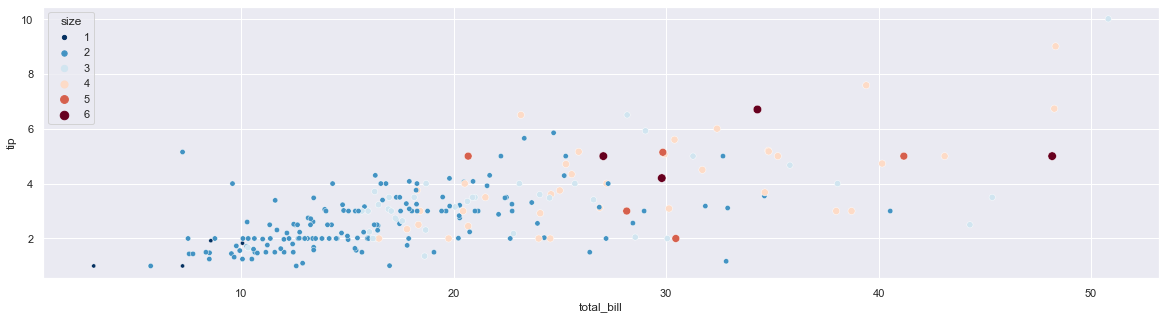

In [4]:
# set hue to same type as size to make the plot easier to read
_, ax = plt.subplots(figsize=(20, 5))
_ = sns.scatterplot(data = df, x = 'total_bill', y='tip', 
    ax=ax, size='size', hue='size', palette='RdBu_r' )

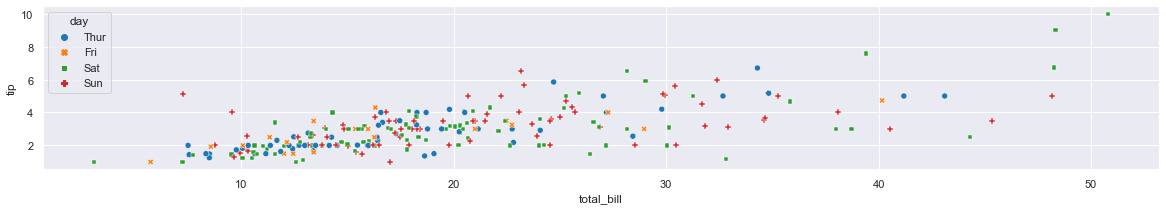

In [5]:
_, ax = plt.subplots(figsize=(20, 3))
_ = sns.scatterplot(data = df, x = 'total_bill', y='tip', 
    ax=ax, style='day', hue='day', palette='tab10' 
)

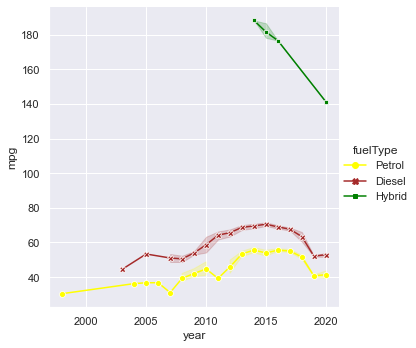

In [6]:
# Line plots are good for time series data
audi_df = pd.read_csv('./data/audi.csv')
sns.relplot( kind='line', 
    data = audi_df[ audi_df['model'] == ' A3'], 
    x='year', y='mpg',
    style='fuelType', markers=True, dashes=False,
    hue='fuelType', palette={'Petrol': 'yellow', 'Diesel': 'brown', 'Hybrid': 'green'}
    # ci=None, # normally 95% confidence interval shows the mean

)

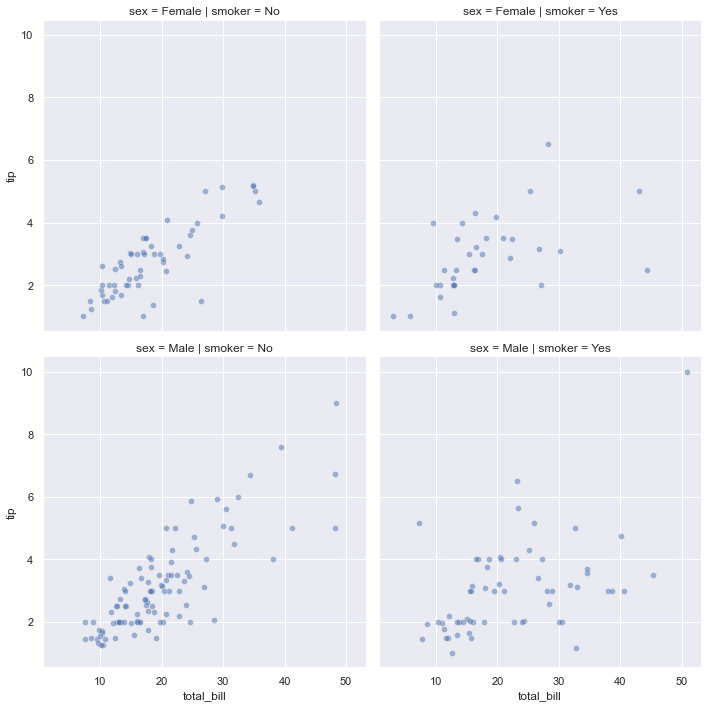

In [7]:
# relplot with row and col and order
_ = sns.relplot(kind='scatter', 
    data = df, 
    row='sex', row_order=['Female', 'Male'], 
    col='smoker', col_order=['No', 'Yes'], 
    x = 'total_bill', y='tip', 
    alpha = 0.5)

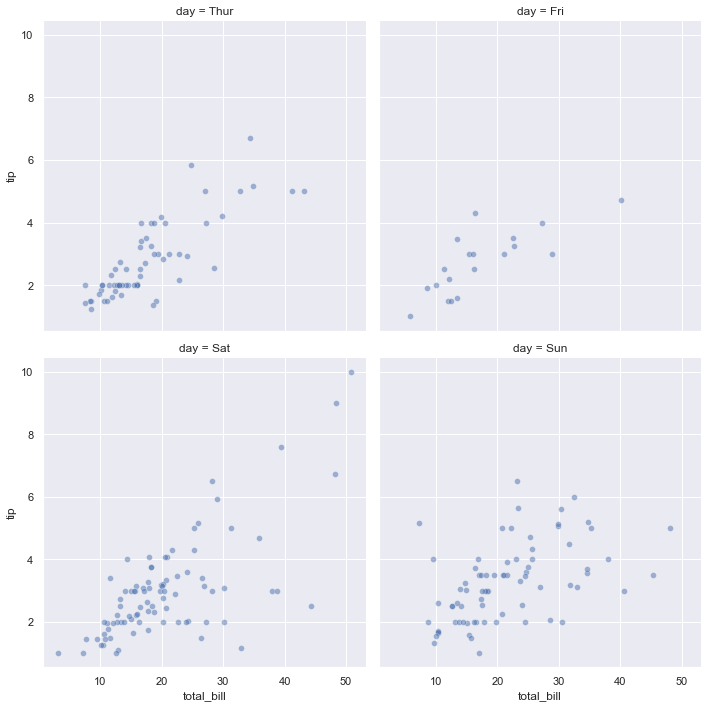

In [8]:
# colwrap
_ = sns.relplot(data = df, 
    col='day', col_wrap=2,
    x = 'total_bill', y='tip', 
    alpha = 0.5)

# Categorical Plots

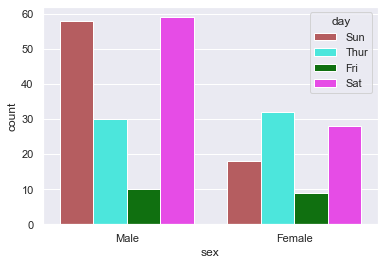

In [9]:
# Count Plot 
# Also shows adjusting hue order and color 

_ = sns.countplot(data = df, x = 'sex', 
    hue='day', 
    hue_order = ['Sun', 'Thur', 'Fri', 'Sat'], 
    palette = {
        'Sun' : 'r', 'Thur': '#33FFF2', 'Fri': 'green', 'Sat': '#F3F',
    }
)

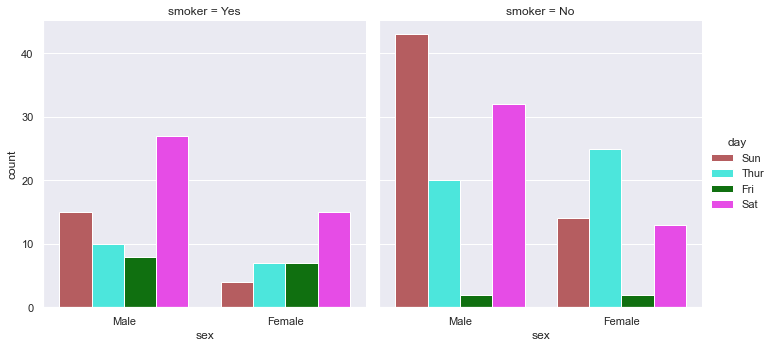

In [13]:
# Use cat plot to be able to plot multiple subplots using row and col
_ = sns.catplot(kind='count', 
    data = df, col='smoker', x = 'sex', 
    hue='day', 
    hue_order = ['Sun', 'Thur', 'Fri', 'Sat'], 
    palette = {
        'Sun' : 'r', 'Thur': '#33FFF2', 'Fri': 'green', 'Sat': '#F3F',
    }
)

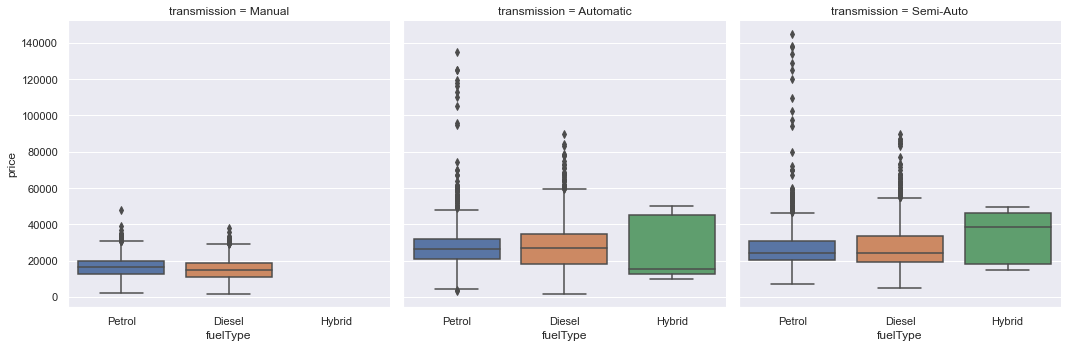

In [32]:
# box plots are a well known method to display the distribution.  If the distribution in the IQR is too complex.  
model_order = [' A1', ' A2', ' A3', ' A4', ' A5', ' A6', ' A7', ' RS3', ' RS4', ' RS5', ' RS6', ' RS7', ' R8'] # leave out some models 
_ = sns.catplot(kind='box', 
    data = audi_df, col='transmission', 
    x = 'fuelType',
    y='price',
    # height=3, aspect=7/3, sharex=False,
    # whis=[5,95], #default whiskers extend to 1.5 * IQR (75q - 25q)
    # sym='', # Don't show outliers

)

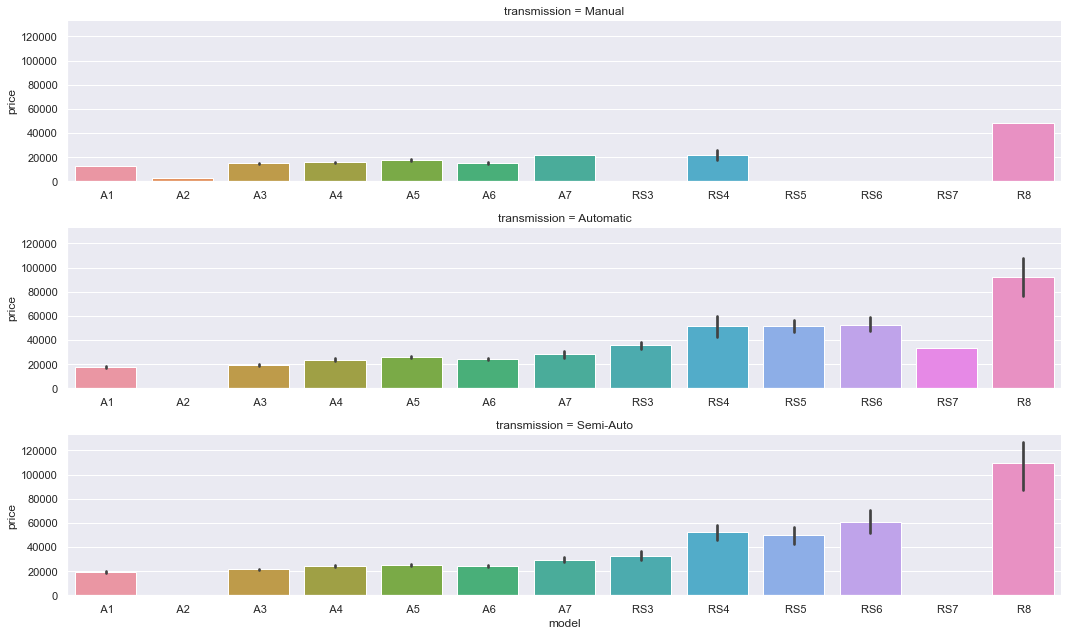

In [35]:
# bar plots show the mean.  This is useful when there are the data spread is large, so summarizing the data helps to focus.

model_order = [' A1', ' A2', ' A3', ' A4', ' A5', ' A6', ' A7', ' RS3', ' RS4', ' RS5', ' RS6', ' RS7', ' R8'] # leave out some models 
_ = sns.catplot(kind='bar', 
    data = audi_df, row='transmission',
    x = 'model', order=model_order,
    y='price',
    height=3, aspect=15/3, sharex=False,
    # ci = None, # The black line shows a 95% confidence interval for the real population mean.
)

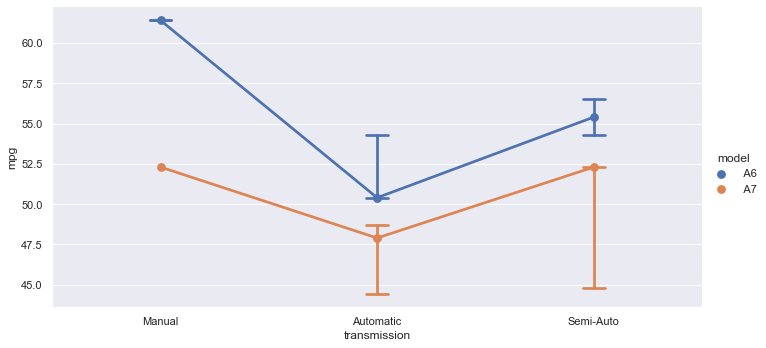

In [57]:
# point plots show the mean (or other estimator).  They are good to visualize significant differences between sub-groups
import numpy as np
_ = sns.catplot(kind='point', 
    data = audi_df, 
    x = 'transmission', y='mpg',
    hue='model', hue_order=[' A6', ' A7'],
    height=5, aspect=10/5,
    estimator=np.median,
    capsize=0.1, # caps for confidedence interval
    # ci = None, # The black line shows a 95% confidence interval for the real population mean.
)

KeyError: 'first_road_class'

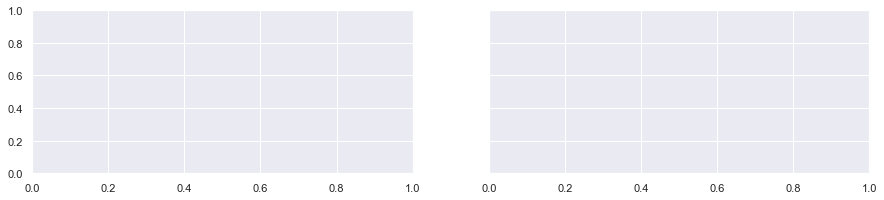

In [10]:
fig, (ax0, ax1) = plt.subplots(
    nrows=1, ncols=2, sharey = True, figsize=(15,3)
)

def plot_density(var_name, ax) :
    sns.distplot(df[var_name], ax=ax, color='b') # TODO handle warning
    ax.set(
        title = f'Density function for variable {col}', 
        # xlabel = 'custom', 
        # xlim = (0,10),
        # ylabel = 'custom', 
        # ylim = (0,10),
    )
    # TODO set labels
    ax.axvline( x = df[var_name].median(), 
        color='g', label='Median', linestyle='--', linewidth=2 )
    ax.axvline( x = df[var_name].mean(), 
        color='r', label='Mean', linestyle='--', linewidth=2 )
    ax.legend()

plot_density('first_road_class', ax0)
plot_density('second_road_class', ax1)


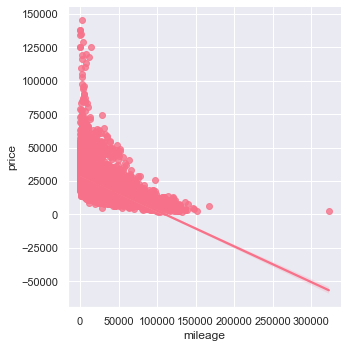

In [ ]:

sns.lmplot(data = df, x='mileage', y='price', 
)

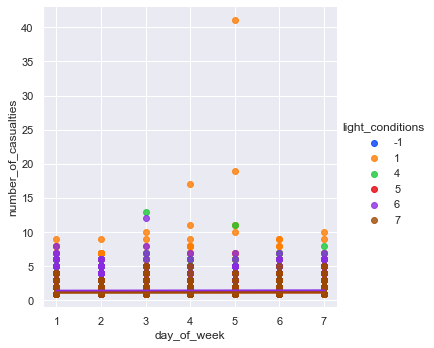

In [ ]:
sns.set_palette('bright')
sns.lmplot(data = df, x='day_of_week', y='number_of_casualties', hue='light_conditions', 
)

In [ ]:
sns.set_palette( sns.color_palette('husl', 6))
_ = sns.factorplot(kind = 'scatter', 
    data = df, row='model', col='transmission', hue='fuelType',
    x='mileage', y='price', 
)

C:\Users\colin\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Plot kind 'scatter' is not recognized

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<AxesSubplot:title={'center':'Residual Plot'}, xlabel='mileage', ylabel='price'>

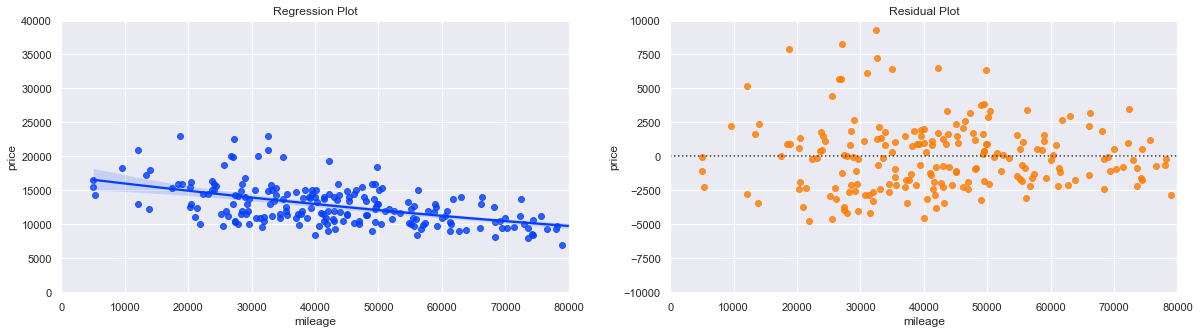

In [ ]:
# Reg plot is convenient for plotting a regression line when there is a small number of values.
a3_df = df[ (df['model'] == ' A3') & (df['year'] == 2015)]

fig, (ax0, ax1) = plt.subplots(
    ncols=2, 
    figsize=(20,5), 
    sharex=True, 
)
cmap = sns.color_palette('bright')

ax0.set(
    title = 'Regression Plot',
    xlim = (0, 80 * 1000), 
    ylim = (0, 40 * 1000),
)
sns.regplot(data = a3_df, x='mileage', y='price', 
    fit_reg=True, order=3, 
    ax=ax0, color=cmap[0])

ax1.set(
    title = 'Residual Plot',
    ylim = (-10 * 1000, 10 * 1000)
)
sns.residplot(data = a3_df, x='mileage', y='price', 
    order=3,
    ax=ax1, color=cmap[1])

<AxesSubplot:title={'center':'Residual Plot'}, xlabel='mileage', ylabel='price'>

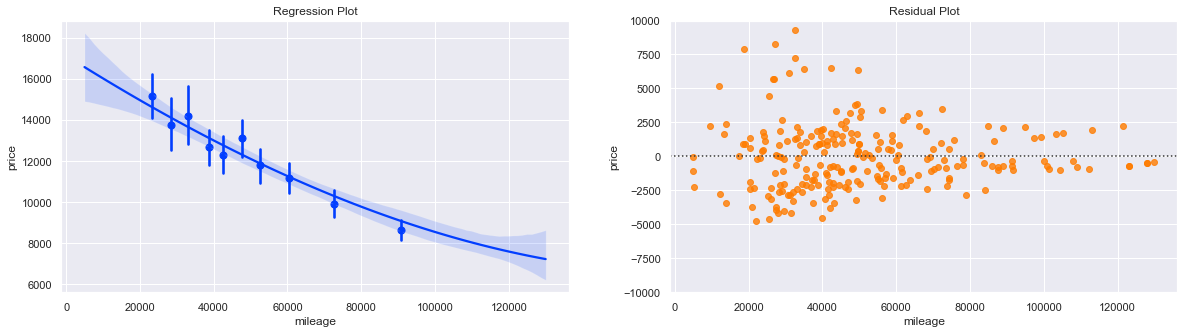

In [ ]:
# For a larger number of values, it makes sense to bin the data
a3_df = df[ (df['model'] == ' A3') & (df['year'] == 2015)]

fig, (ax0, ax1) = plt.subplots(
    ncols=2, 
    figsize=(20,5), 
    sharex=True, 
)
cmap = sns.color_palette('bright')

ax0.set(
    title = 'Regression Plot',
)
sns.regplot(data = a3_df, x='mileage', y='price', 
    x_bins=10, 
    order=3, 
    fit_reg=True,
    ax=ax0, color=cmap[0])

ax1.set(
    title = 'Residual Plot',
    ylim = (-10 * 1000, 10 * 1000)
)
sns.residplot(data = a3_df, x='mileage', y='price', order=3,
    ax=ax1, color=cmap[1])

# Categorical Visualization

In [ ]:
# severe_df = df[ df['pedestrian_crossing_human_control'] == 1].copy()
# severe_df = df.copy()
df['junction_detail'] = df['junction_detail'].astype('category')
df['junction_control'] = df['junction_control'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


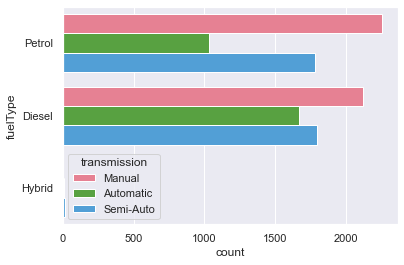

In [ ]:
_ = sns.countplot(data=df,
    y='fuelType',
    hue = 'transmission',
    palette='husl',
)

In [ ]:
selected_models_df.model.value_counts()
# selected_models_df.head()

 A3    1929
 A4    1381
 A1    1347
 A5     882
 A6     748
 A2       1
Name: model, dtype: int64

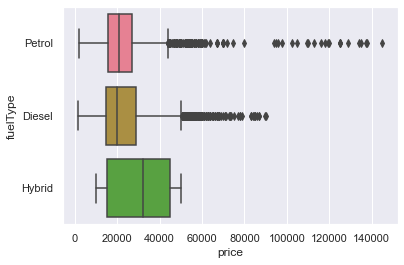

In [ ]:
_ = sns.boxplot(data=df,
    y='fuelType',
    x = 'price',
    # palette='husl',
)

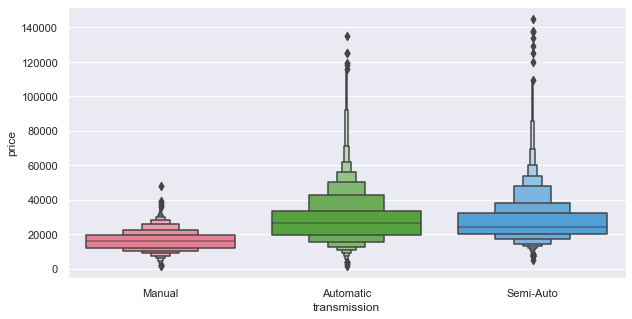

In [ ]:
# This plot is best when there are a small number of categories and there is a need to plot outliers
fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.boxenplot(data=df, ax = ax,
    x='transmission',
    y='price',
    palette='husl',
)

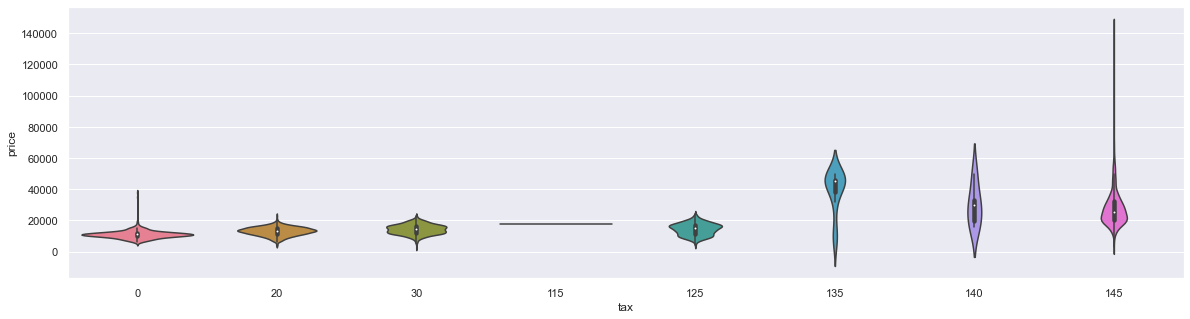

In [ ]:
# Violin plots are good for a medium number of categories as they summarize the distribution of the data.  They are not good to show outliers.
low_tax_df = df[ df['tax'] < 150 ]
fig, ax = plt.subplots(figsize=(20, 5))
_ = sns.violinplot(data=low_tax_df, ax = ax,
    x='tax',
    y='price',
    palette='husl',
)

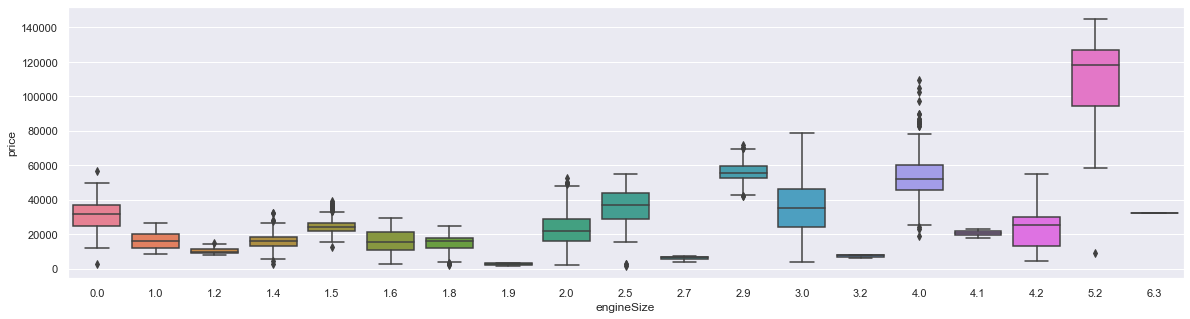

In [ ]:
# Boxplots are best when there are a large number of categories as they summarize the data concisely.
fig, ax = plt.subplots(figsize=(20, 5))
_ = sns.boxplot(data=df, ax = ax,
    x='engineSize',
    y='price',
    palette='husl',
)

In [ ]:
# Swarm plot is slow
fig, ax = plt.subplots(figsize=(20, 5))
sns.swarmplot(data=severe_df, ax = ax,
         x='time',
         y='junction_control',
         hue='junction_detail')

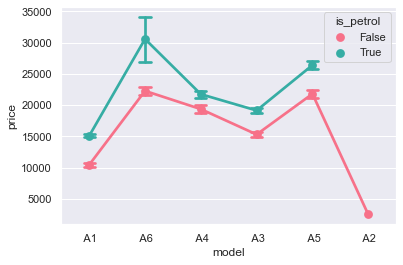

In [ ]:
# Point plots show the mean value with uncertainty. 
selected_models_df = df[ df['model'].isin([' A1', ' A2', ' A3', ' A4', ' A5', ' A6']) ].copy()
selected_models_df['is_petrol'] = selected_models_df.fuelType.apply(
    lambda x : x == 'Petrol'
)
_ = sns.pointplot(data=selected_models_df,
    x ='model',
    y = 'price',
    capsize = 0.2,
    hue = 'is_petrol',
    palette='husl',
)

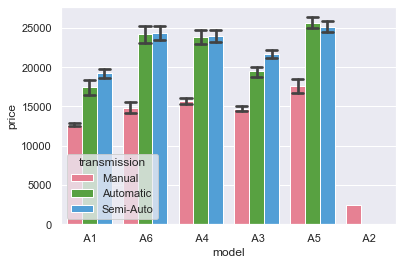

In [ ]:
# Bar plots also show the mean value, they are easier to read when the means are close.  
_ = sns.barplot(data=selected_models_df,
    x ='model',
    y = 'price',
    capsize = 0.2,
    hue = 'transmission',
    palette='husl',
)

# Matrix Plots

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='model'>

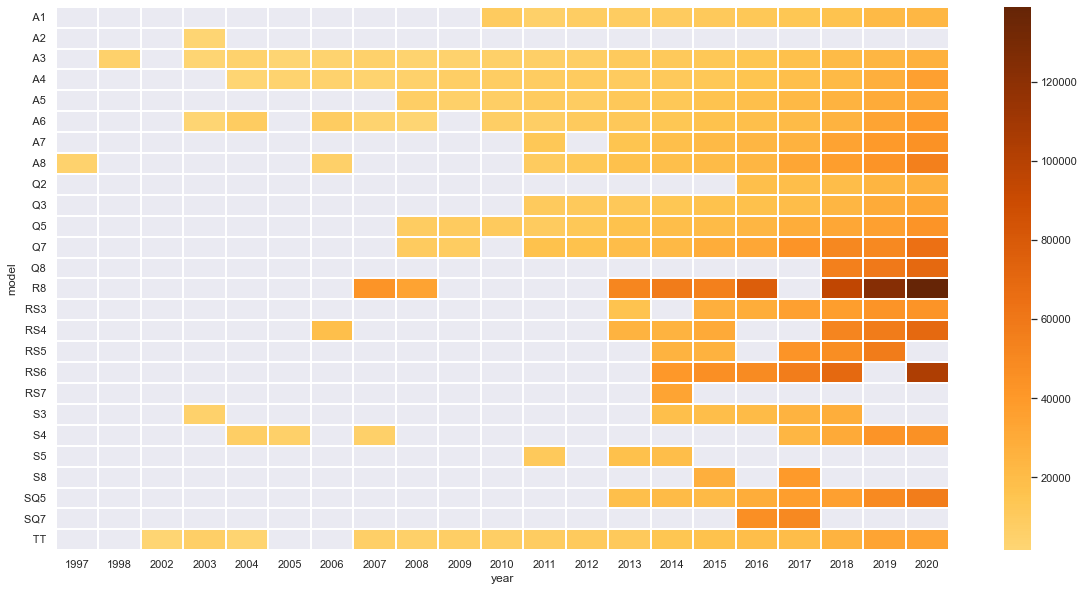

In [ ]:
df_crosstab = pd.crosstab(df['model'], df['year'], values=df['price'], 
    aggfunc= lambda x : int(x.mean()))
fig,ax = plt.subplots(figsize=(20, 10))
_ = sns.heatmap( 
    df_crosstab,
    center = 40 * 1000,
    ax = ax,
    annot=False, fmt='d',
    cbar = True, 
    cmap = 'YlOrBr', 
    linewidths=0.3, 

)
ax.set(
    title = 'Mean price per model per year'
)

# Facet Grids

C:\Users\colin\miniconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


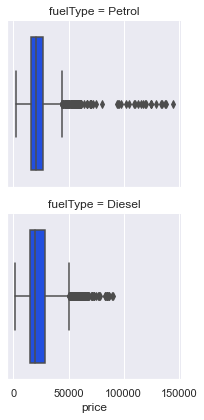

In [ ]:
# fig,ax = plt.subplots( figsize=(20, 6))
grid = sns.FacetGrid(df, 
    row = 'fuelType',
    row_order = ['Petrol', 'Diesel', ], # omitted Hybrid
)
grid.map(sns.boxplot, 'price')

C:\Users\colin\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


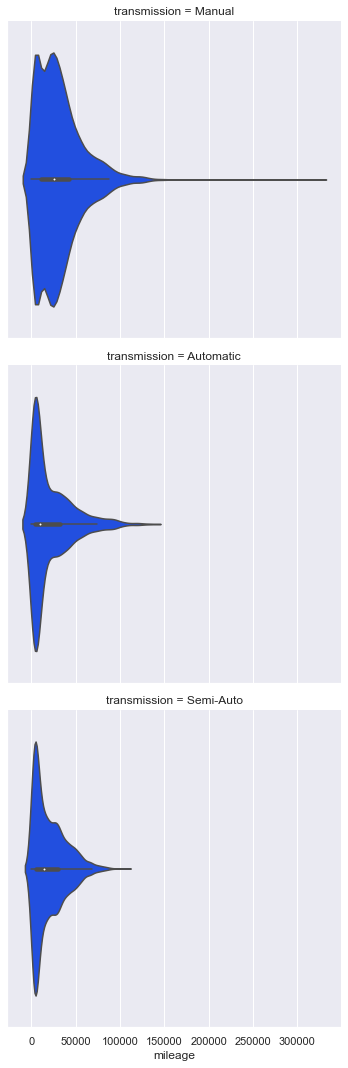

In [ ]:
sns.factorplot(data = df, x='mileage', row='transmission', kind='violin')